In [ ]:
!pip install ctgan
!pip install table_evaluator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from ctgan import load_demo
real_data = load_demo()
print(real_data.head(5))

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

In [ ]:
from ctgan import CTGANSynthesizer

# Identifies all the discrete columns

discrete_columns = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country',
    'income'
]

# Initiates the CTGANSynthesizer and call its fit method to pass in the table
 
ctgan = CTGANSynthesizer(epochs=10)
ctgan.fit(real_data, discrete_columns)

#generate synthetic data, 1000 rows of data

synthetic_data = ctgan.sample(1000)
print(synthetic_data.head(5))

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282:

   age          workclass  fnlwgt      education  education-num  \
0   19            Private  264493        HS-grad             10   
1   28   Self-emp-not-inc  278548        HS-grad             14   
2   23            Private  140968   Some-college             15   
3   20            Private   32255   Some-college             10   
4   88                  ?  143879   Some-college              0   

        marital-status        occupation     relationship    race      sex  \
0        Never-married   Exec-managerial          Husband   White     Male   
1   Married-civ-spouse             Sales    Not-in-family   White     Male   
2   Married-civ-spouse      Craft-repair        Own-child   White     Male   
3   Married-civ-spouse   Exec-managerial   Other-relative   White     Male   
4   Married-civ-spouse             Sales          Husband   White   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0            82          1240              21   United-S

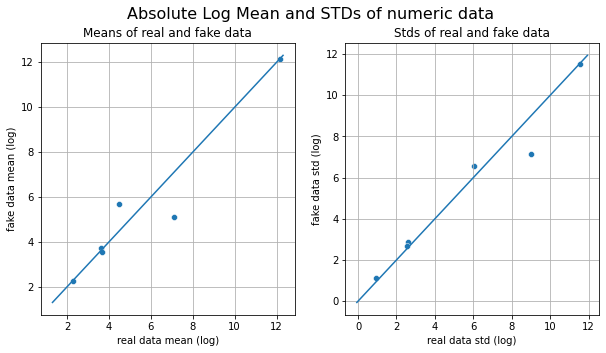

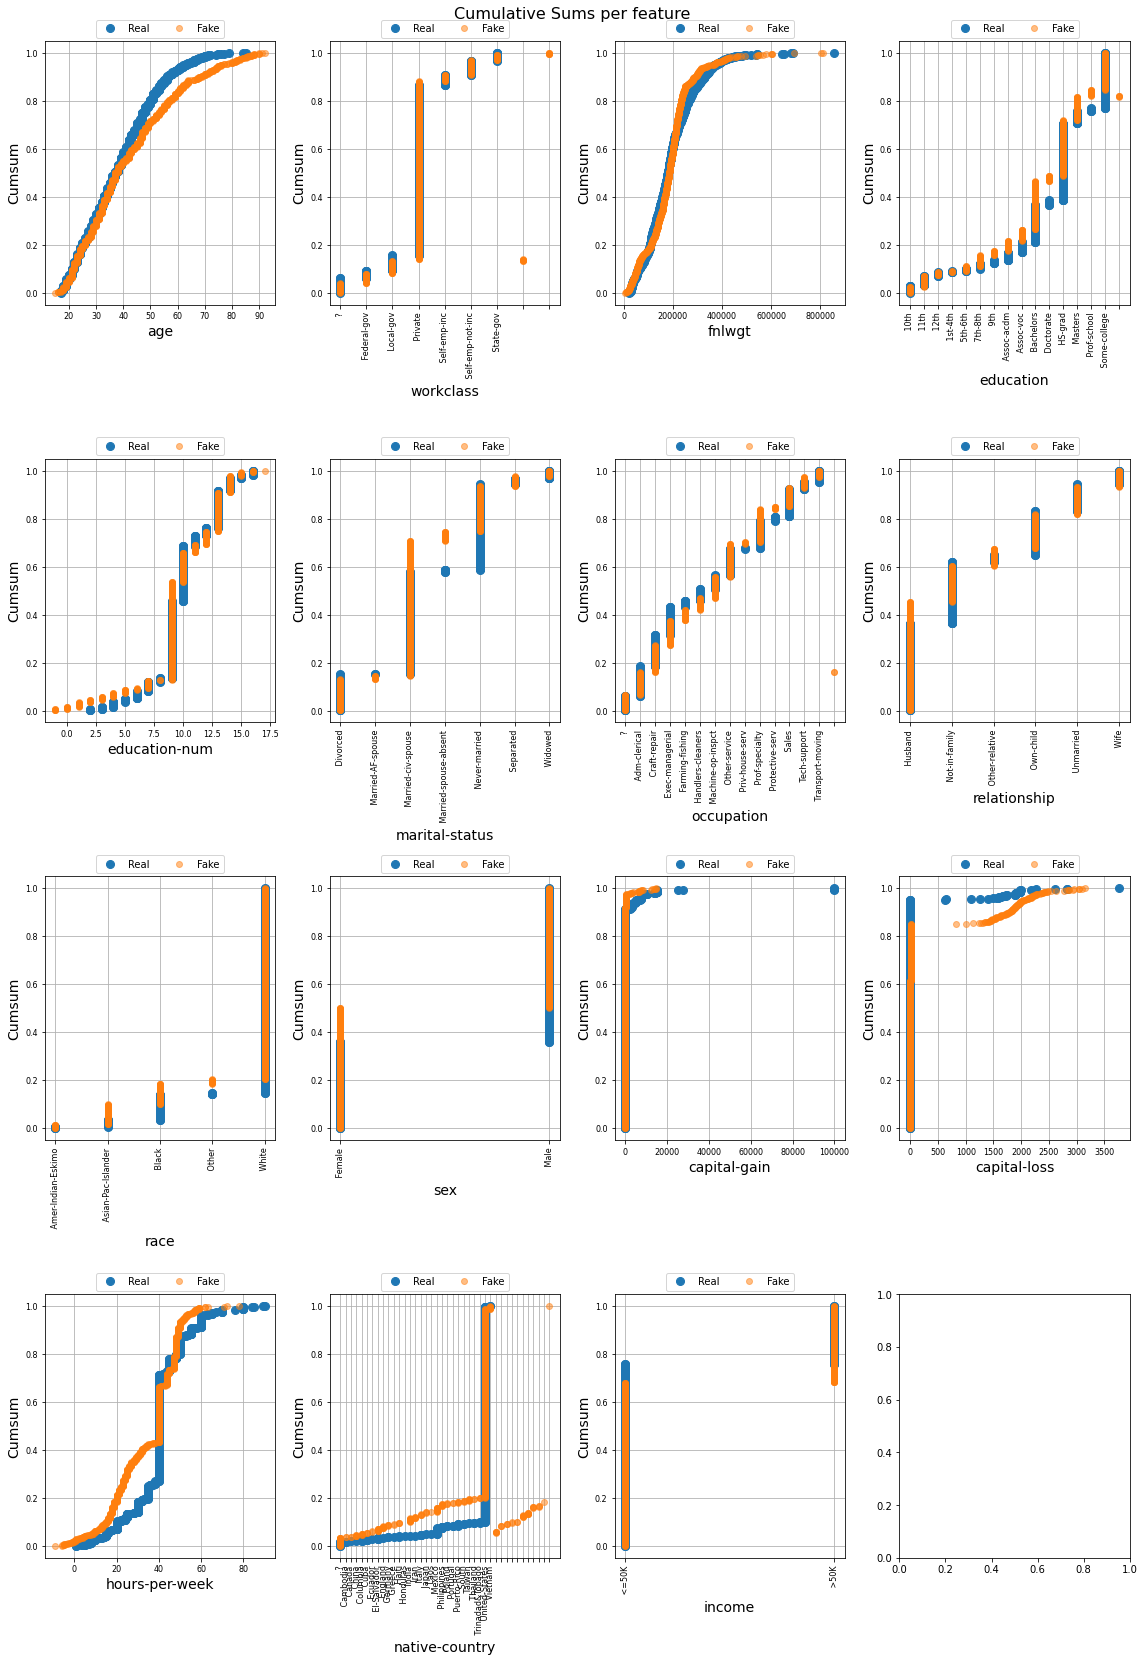

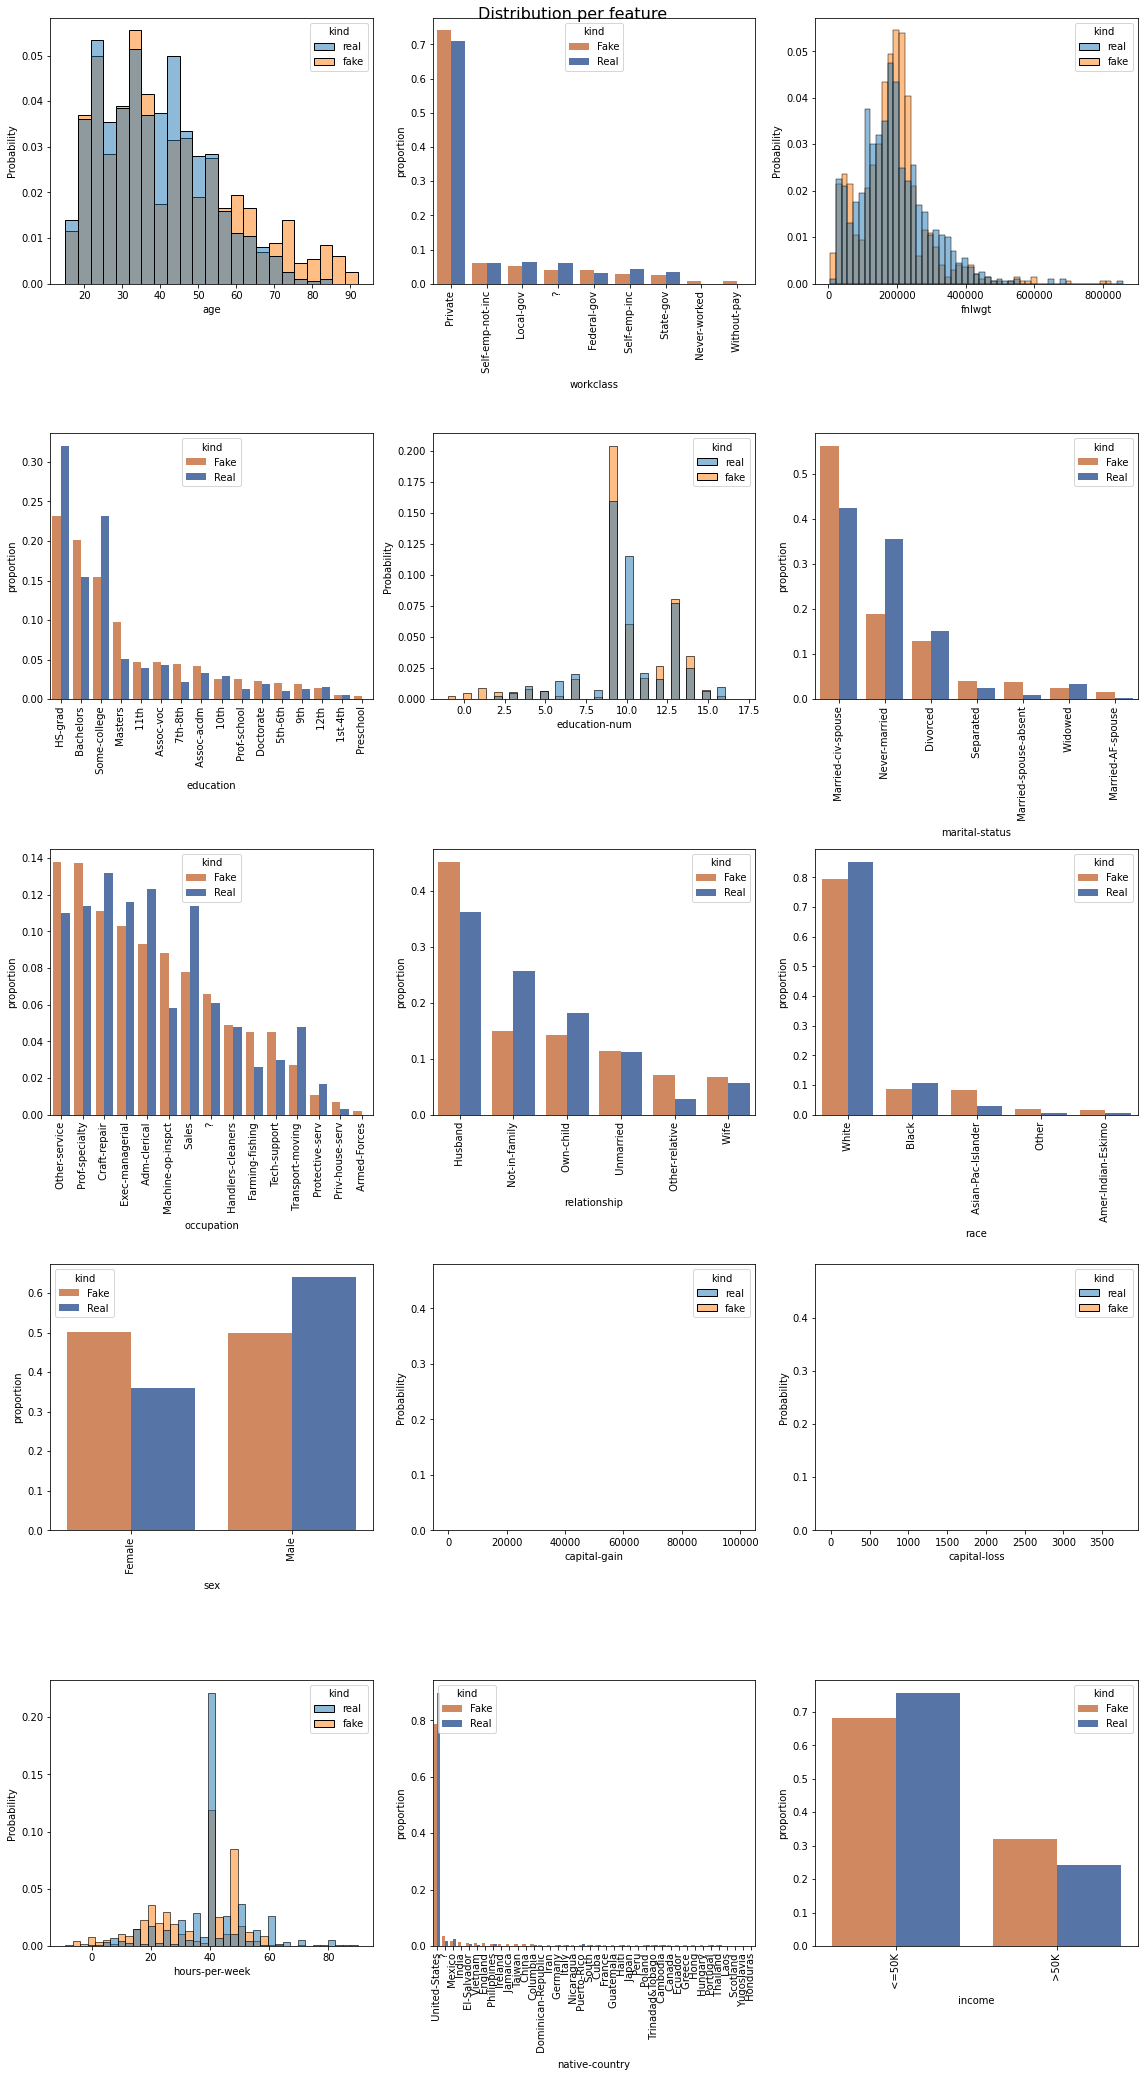

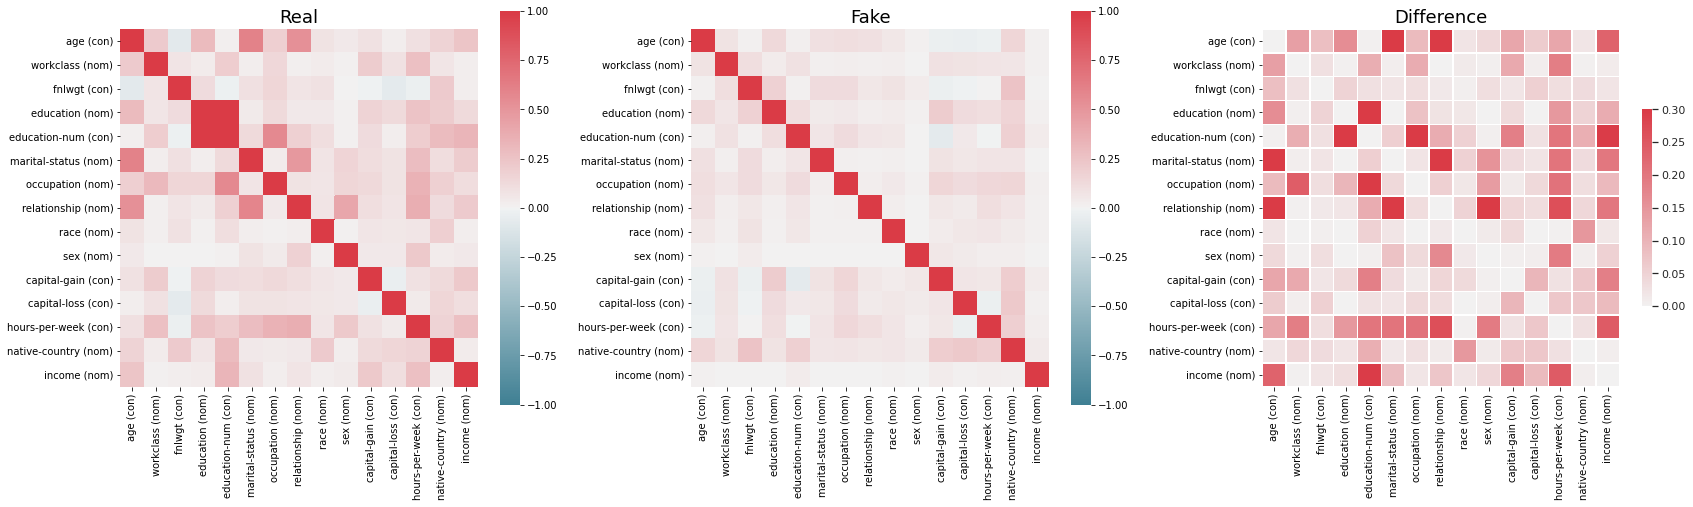

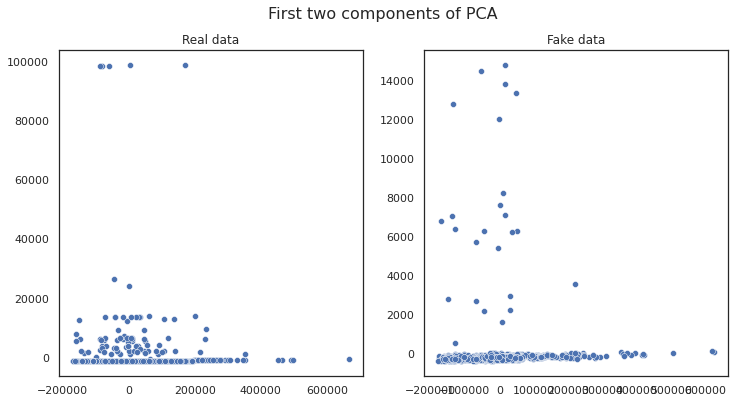

In [ ]:
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(real_data, synthetic_data)
table_evaluator.visual_evaluation()